# SpaceX recovery plot

Inspired by the following posts:

https://x.com/stats_feed/status/

https://x.com/stats_feed/status/1752629060772171810?s=20

However, there were some discrepancies so I asked Grok to work out the data for me ( [Grok Link](https://x.com/i/grok/share/haY027BvIpkRfPMZHq3N3g7tg) ):


Here's the data on SpaceX's launches per year and their success rates:

Launches by Year and Success Rate:

2006: 1 launch, 0 successful.

2007: 1 launch, 0 successful.

2008: 2 launches, 1 successful.

2009: 1 launch, 1 successful.

2010: 2 launches, 2 successful.

2011: 0 launches.

2012: 2 launches, 2 successful.

2013: 3 launches, 3 successful.

2014: 6 launches, 5 successful.

2015: 7 launches, 7 successful.

2016: 9 launches, 8 successful.

2017: 18 launches, 18 successful.

2018: 21 launches, 21 successful.

2019: 13 launches, 13 successful.

2020: 27 launches, 26 successful (one failure was a Starship prototype test).


2021: 33 launches, all successful.

2022: 61 launches, 61 successful.

2023: 98 launches, 96 successful (two were Starship test flights which did not reach orbit).


2024: 134 launches, 133 successful (one failure was the Starlink Group 9-3 mission).


2025: 7 launches, all successful as of January 15.


These figures reflect the total number of launches including Falcon 1, Falcon 9, Falcon Heavy, and Starship. Starship test flights are generally not counted in success/failure statistics for overall mission success rates unless they achieve significant milestones like reaching orbit.



## Imports

In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import numpy as np

### Fonts

I've used the following `SpaceX` font for the title of this chart:

https://www.fontget.com/font/spacex/

In [2]:
from matplotlib import font_manager

# Add system fonts so matplotlib sees them
for font in font_manager.findSystemFonts(fontpaths=None, fontext='ttf'):
    font_manager.fontManager.addfont(font)

In [3]:
# DEV
from datetime import date

metadata_dict = {
    "Title": "Twitter/X Matplotlib tutorial",
    "Author": "Pawel Jastrzebski (pawjast)",
    "Description": "https://medium.com/@pawjast https://twitter.com/pawjast https://github.com/pawjast www.linkedin.com/in/pawjast https://www.youtube.com/@pawjast https://pawjast.substack.com/",
    "Creation Time": f"{date.today():%d %B %Y}",
    "Source": "https://twitter.com/pawjast"
}

## Data

In [4]:
df = pd.DataFrame.from_dict(
    {
        2025: [7, 7],  # as of Jan 15
        2024: [133, 134],
        2023: [96, 98],
        2022: [61, 61],
        2021: [31, 31],
        2020: [26, 27],
        2019: [13, 13],
        2018: [21, 21],
        2017: [18, 18],
        2016: [8, 9],
        2015: [7, 7],
        2014: [5, 6],
        2013: [3, 3],
        2012: [2, 2],
        2011: [0, 0],
        2010: [2, 2],
        2009: [1, 1],
        2008: [1, 2],
        2007: [0, 1],
        2006: [0, 1],
    },
    orient="index",
    columns=["recovered", "all"]
)

df["rate"] = df["recovered"] / df["all"]

# Normally you'd want to convert date to a `datetime format`but in this case
# It complicates the plotting so we're skipping the process

# Convert index from `int` to `DateTime`
# df.index = pd.to_datetime(df.index, format="%Y")

df


,recovered,all,rate
2025,7,7,1.000000
2024,133,134,0.992537
2023,96,98,0.979592
2022,61,61,1.000000
2021,31,31,1.000000
2020,26,27,0.962963
2019,13,13,1.000000
2018,21,21,1.000000
2017,18,18,1.000000
2016,8,9,0.888889


## Plot

### Main values

In [5]:
line_width = 2
main_colour = "white"
bg_colour = "#0b0103"
complementary_col = "#7dc0fb"

### rcParams

In [6]:
# Settings
rcParams.update(
    {
        "figure.facecolor": bg_colour,
        "figure.figsize": (16, 10),
        "axes.facecolor": (0.0, 0.0, 0.0, 0.0),
        "axes.spines.left": False,
        "axes.spines.top": False,
        "axes.spines.right": False,
        "axes.linewidth": line_width,
        "axes.edgecolor": main_colour,
        "axes.grid": True,
        "axes.grid.axis": "y",
        "axes.axisbelow": True,
        "axes.labelcolor": main_colour,
        "axes.titley": 0.98,
        "grid.color": complementary_col,
        "grid.linewidth": 0.8,
        "font.family": "Roboto",
        "font.size": 22,
        "text.color": main_colour,
        "xtick.labelcolor": main_colour,
        "ytick.labelcolor": main_colour,
        "xtick.bottom": False,
        "ytick.left": False,
        "legend.frameon": False,
        "legend.loc": "upper left",
        "axes.titlelocation": "left",
        "patch.linewidth": line_width
    }
)

### Plotting function

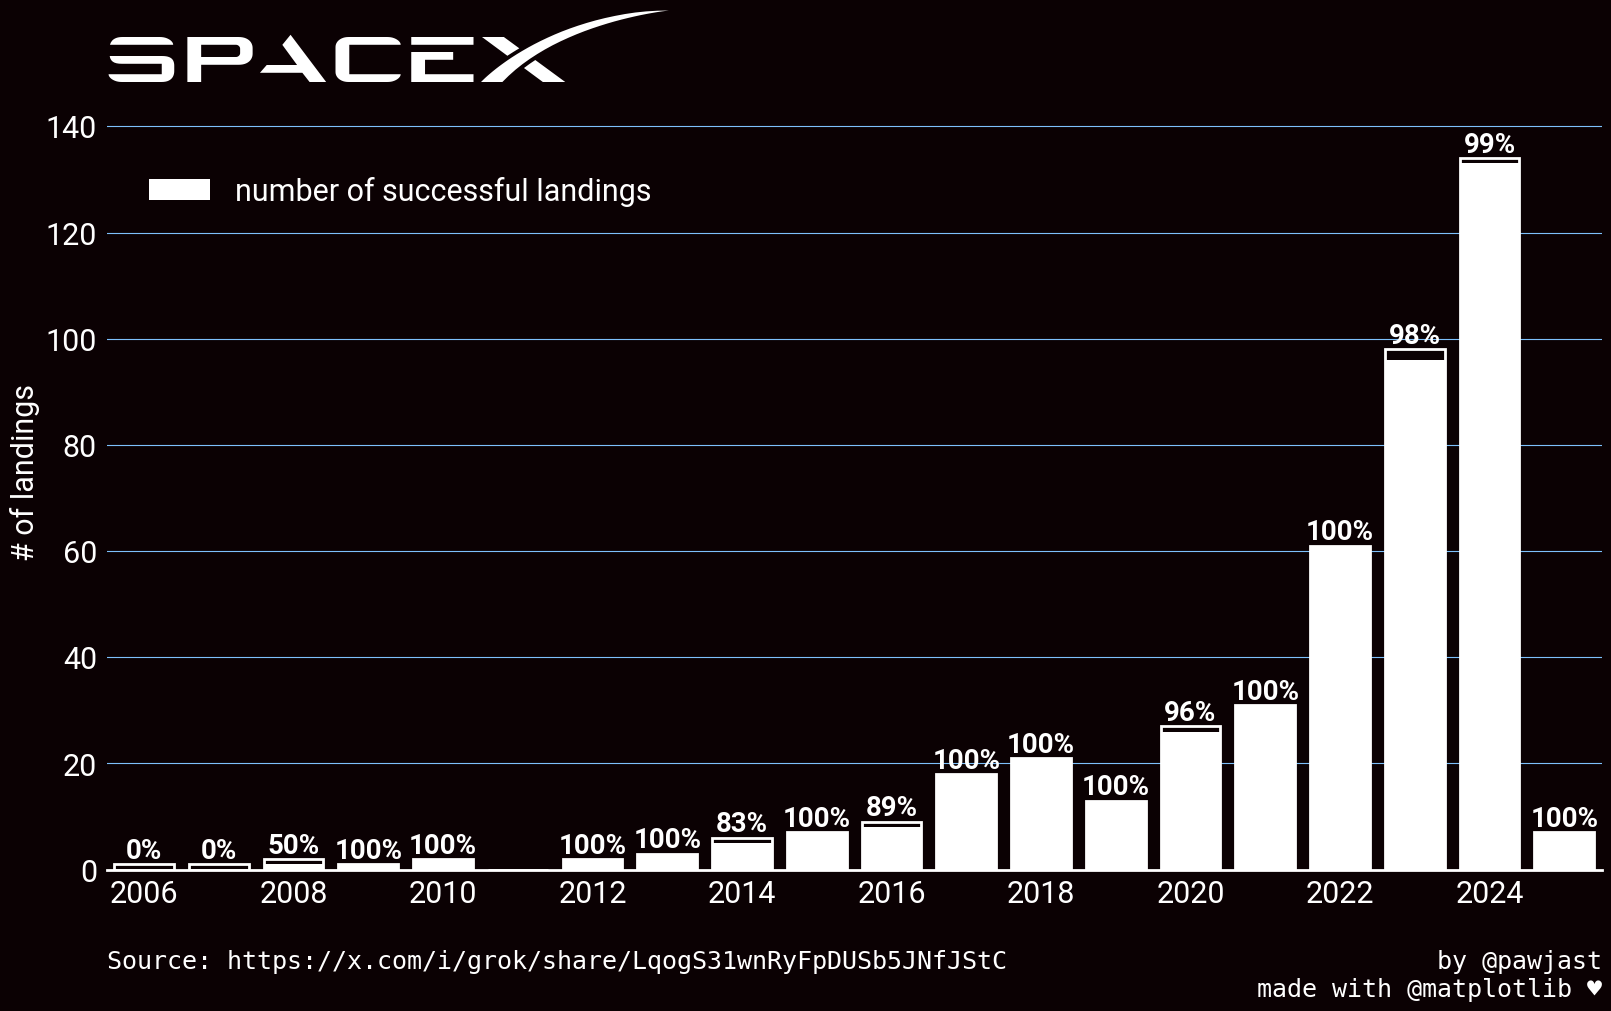

In [7]:
fig, ax = plt.subplots(
    layout="constrained"
)

ax.set_title(
    "SpaceX",
    fontname="SpaceX",
    fontsize=50,
)


ax.bar(
    x=df.index,
    height=df["all"],
    facecolor=bg_colour,
    edgecolor=main_colour,
)
bars = ax.bar(
    x=df.index,
    height=df["recovered"],
    label="number of successful landings",
    facecolor=main_colour,
    edgecolor=(0.0, 0.0, 0.0, 0.0)
)

ax.set_xlim(2005.5, 2025.5)
ax.set_xticks(
    ticks=df.index[::-1][::2],
    labels=[f"{x}" for x in df.index[::-1][::2]]
)
ax.set_yticks(
    range(0, 150, 20)
)
ax.set_ylim(0, 150)
ax.set_ylabel("# of landings")

ax.legend(
    bbox_to_anchor=(0.01, 0.905)
)

# Add bar data labels
for items in df.iterrows():
    x_pos = items[0]
    y_pos = items[1].iloc[1]
    y_val = items[1].iloc[2]
    if np.isnan(y_val):
        txt = ""
    else:
        txt = f"{y_val:.0%}"

    ax.text(
        x_pos, y_pos,
        txt,
        ha="center",
        va="bottom",
        fontsize=20,
        weight="bold"
    )

# Update bottom spine thickness
# ax.spines["bottom"].set_linewidth(line_width)

# Footer
ax.text(
    0.0, -0.1,
    "Source: https://x.com/i/grok/share/LqogS31wnRyFpDUSb5JNfJStC",
    transform = ax.transAxes,
    horizontalalignment="left",
    verticalalignment="top",
    fontsize=18,
    family="monospace",
    weight="medium"
)
ax.text(
    1, -0.1,
    "by @pawjast\nmade with @matplotlib \u2665",
    transform = ax.transAxes,
    horizontalalignment="right",
    verticalalignment="top",
    fontsize=18,
    family="monospace",
    weight="medium"
);

# plt.savefig(
#     fname="name.png",
#     format="png",
#     dpi=125,
#     metadata=metadata_dict
# );